In [ ]:
# Description: This program use Convolutional Neural Networks(CNN)
#              classify handwritten digits as number 0-9

In [ ]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing necessary libraries
from keras.datasets import mnist  # Ensure this import is present

# Load the data and split it into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shape of the data to confirm it is loaded correctly
print(X_train.shape)
print(X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


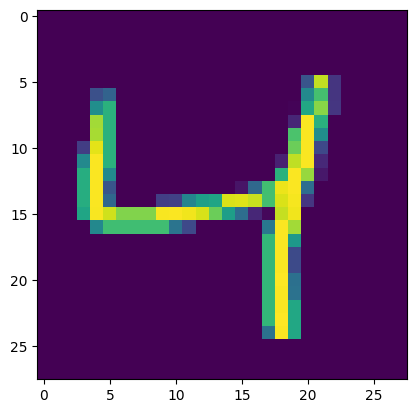

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [5]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [7]:
from keras.utils import to_categorical
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 150s 80ms/step - accuracy: 0.9793 - loss: 0.0654 - val_accuracy: 0.9801 - val_loss: 0.0650
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 157s 84ms/step - accuracy: 0.9851 - loss: 0.0480 - val_accuracy: 0.9798 - val_loss: 0.0742
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 81ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.9814 - val_loss: 0.0669
